In [38]:
import pandas as pd
import matplotlib.pyplot as plt


In [39]:
!pip install gspread==5.7.2
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

In [40]:

worksheet = gc.open_by_key('1i-RWGr7VfZ8d1NCPvY4T22Wq3Gr9nlkC7JuNcp_0oGg').sheet1


sales_data = pd.DataFrame(worksheet.get_all_records())


print(sales_data.head())

       Date    Product  Sales Region
0  8/1/2023  Product A    100  North
1  8/2/2023  Product B    150  South
2  8/3/2023  Product A    120   West
3  8/4/2023  Product C    130   East
4  8/5/2023  Product B    160  North


In [41]:
print(sales_data.isnull().sum())


Date       0
Product    0
Sales      0
Region     0
dtype: int64


In [42]:
print(sales_data.describe())



            Sales
count   20.000000
mean   220.500000
std     65.892656
min    100.000000
25%    175.000000
50%    225.000000
75%    272.500000
max    320.000000


In [43]:
print(sales_data.dtypes)

Date       object
Product    object
Sales       int64
Region     object
dtype: object


In [44]:
sales_data.dropna(inplace=True)
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
product_sales = sales_data.groupby('Product')['Sales'].sum()
print(product_sales)



Product
Product A    1450
Product B    1600
Product C    1360
Name: Sales, dtype: int64


In [45]:
region_sales = sales_data.groupby('Region')['Sales'].sum()
print(region_sales)

Region
East     1170
North    1000
South    1130
West     1110
Name: Sales, dtype: int64


In [46]:
daily_sales = sales_data.groupby('Date')['Sales'].sum()
print(daily_sales)

Date
2023-08-01    100
2023-08-02    150
2023-08-03    120
2023-08-04    130
2023-08-05    160
2023-08-06    200
2023-08-07    180
2023-08-08    190
2023-08-09    210
2023-08-10    220
2023-08-11    230
2023-08-12    250
2023-08-13    240
2023-08-14    260
2023-08-15    270
2023-08-16    280
2023-08-17    290
2023-08-18    300
2023-08-19    310
2023-08-20    320
Name: Sales, dtype: int64


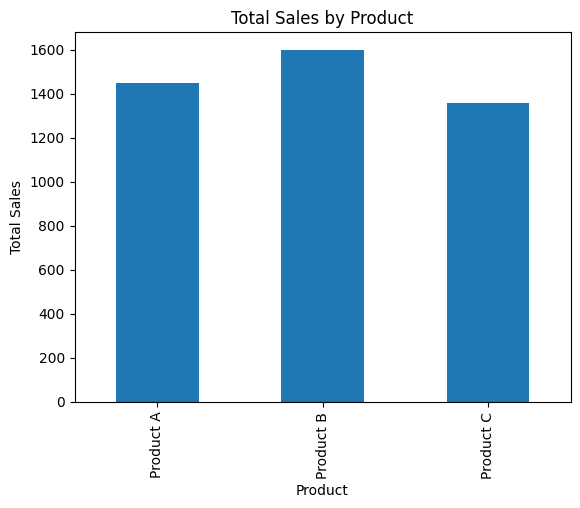

In [47]:
product_sales.plot(kind='bar', title='Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()


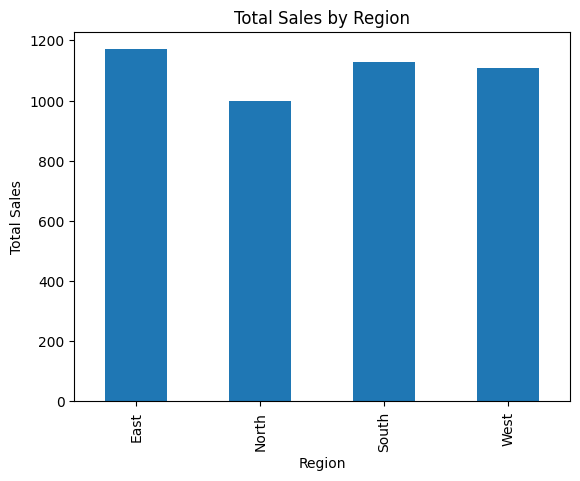

In [48]:
region_sales.plot(kind='bar', title='Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


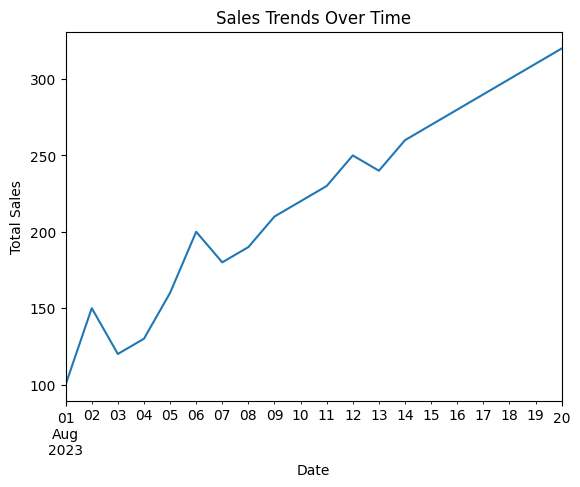

In [49]:
daily_sales.plot(kind='line', title='Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()
